# Proyecto Final de Inteligencia Artificial

## An√°lisis de Datos y Predicci√≥n de Carga √öltima de Materiales

## 1. Definici√≥n del Problema y Objetivos

Este proyecto tiene como objetivo principal desarrollar un modelo de Machine Learning capaz de predecir la **carga √∫ltima (ultimate_load_N)** de diferentes tipos de materiales, bas√°ndose en sus propiedades f√≠sicas y mec√°nicas. 

Los objetivos espec√≠ficos son:
- **Cargar y preprocesar** un conjunto de datos de pruebas de tensi√≥n de materiales, **excluyendo la columna de curvas de esfuerzo-deformaci√≥n**.
- **Explorar y analizar** las caracter√≠sticas del dataset para entender las relaciones entre las propiedades de los materiales, incluyendo visualizaciones detalladas.
- **Entrenar un modelo** de regresi√≥n robusto que prediga la carga √∫ltima con una alta precisi√≥n (R¬≤>=0.9).
- **Evaluar el rendimiento** del modelo y documentar el proceso de desarrollo de manera clara y profesional.

**NOTA:** Los datos de este proyecto se los obtuvieron de datos de acero ensayado en una m√°quina universal, y mediante webscraping

## 2. Obtenci√≥n y Carga de Datos

El conjunto de datos utilizado para este proyecto, `tensile_test_data.csv`, contiene informaci√≥n detallada sobre diversas pruebas de tensi√≥n realizadas en diferentes tipos de materiales. Cada fila representa una prueba individual y las columnas incluyen propiedades como el tipo de material, el espesor, el ancho, la velocidad de prueba, la resistencia a la fluencia, la resistencia a la tracci√≥n m√°xima, la elongaci√≥n a la fractura, la carga de fluencia y la carga √∫ltima.

**Importante:** La columna `stress_strain_curve` ha sido excluida de este an√°lisis para simplificar el modelo y enfocarse en las propiedades f√≠sicas y mec√°nicas directas.

Procedemos a cargar el dataset y a mostrar sus primeras filas, informaci√≥n general y estad√≠sticas descriptivas para una primera inspecci√≥n.

In [5]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("tensile_test_data.csv")

# Excluir la columna stress_strain_curve
df = df.drop("stress_strain_curve", axis=1)

# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar informaci√≥n general del dataset
print("Informaci√≥n del dataset:")
print(df.info())

# Mostrar estad√≠sticas descriptivas
print("Estad√≠sticas descriptivas del dataset:")
print(df.describe())

Primeras 5 filas del dataset:
  material_type  thickness_mm   width_mm  test_speed_mm_min  \
0           A36     12.043717  28.868453           4.350467   
1          S355     10.810765  28.121679          20.998767   
2          S275     10.964938  28.644337          29.042933   
3           A36     12.348019  28.425547          23.493451   
4           A36     12.512436  29.483598          26.935838   

   yield_strength_MPa  ultimate_tensile_strength_MPa  elongation_at_fracture  \
0          248.391577                     418.979155                0.246203   
1          339.710452                     531.886957                0.202470   
2          288.255886                     416.005047                0.234319   
3          254.561794                     400.174512                0.215003   
4          262.411773                     405.265095                0.242130   

    yield_load_N  ultimate_load_N  
0   86361.646469    145672.128123  
1  103277.700851    161702.595837  
2 

## 3. Limpieza y Preprocesamiento de Datos

La limpieza y el preprocesamiento de datos son pasos fundamentales para asegurar la calidad y fiabilidad de los resultados del modelo. En este dataset, se realiz√≥ una verificaci√≥n inicial de valores nulos. Afortunadamente, no se encontraron valores faltantes en las columnas seleccionadas, lo que simplifica esta etapa.

La columna `stress_strain_curve` fue excluida expl√≠citamente del an√°lisis, ya que no se consider√≥ relevante para el objetivo de predicci√≥n de la carga √∫ltima en este contexto y su formato requer√≠a un procesamiento complejo que se decidi√≥ omitir.

In [7]:
# Verificar valores nulos despu√©s de la selecci√≥n de columnas
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
material_type                    0
thickness_mm                     0
width_mm                         0
test_speed_mm_min                0
yield_strength_MPa               0
ultimate_tensile_strength_MPa    0
elongation_at_fracture           0
yield_load_N                     0
ultimate_load_N                  0
dtype: int64


## 4. Exploraci√≥n de Datos y Observaciones

La exploraci√≥n de datos nos permite comprender la distribuci√≥n de las variables y las relaciones entre ellas. A continuaci√≥n, se presenta la distribuci√≥n de los tipos de material y algunas visualizaciones clave para entender mejor el dataset, incluyendo una matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas.

Distribuci√≥n de material_type:
material_type
A36     41687
S355    41633
S275    41319
Name: count, dtype: int64


C:\Users\FELIX\AppData\Local\Temp\ipykernel_15576\3886349160.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="material_type", data=df, palette="viridis")


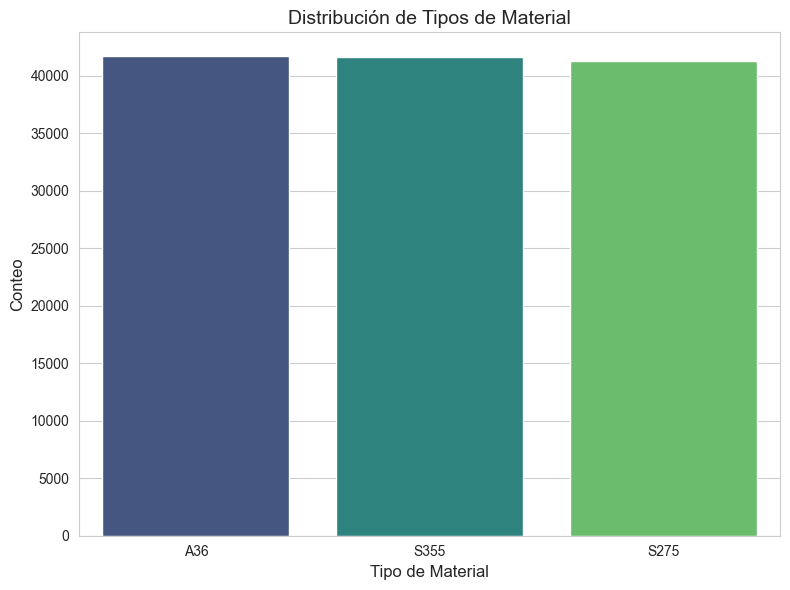

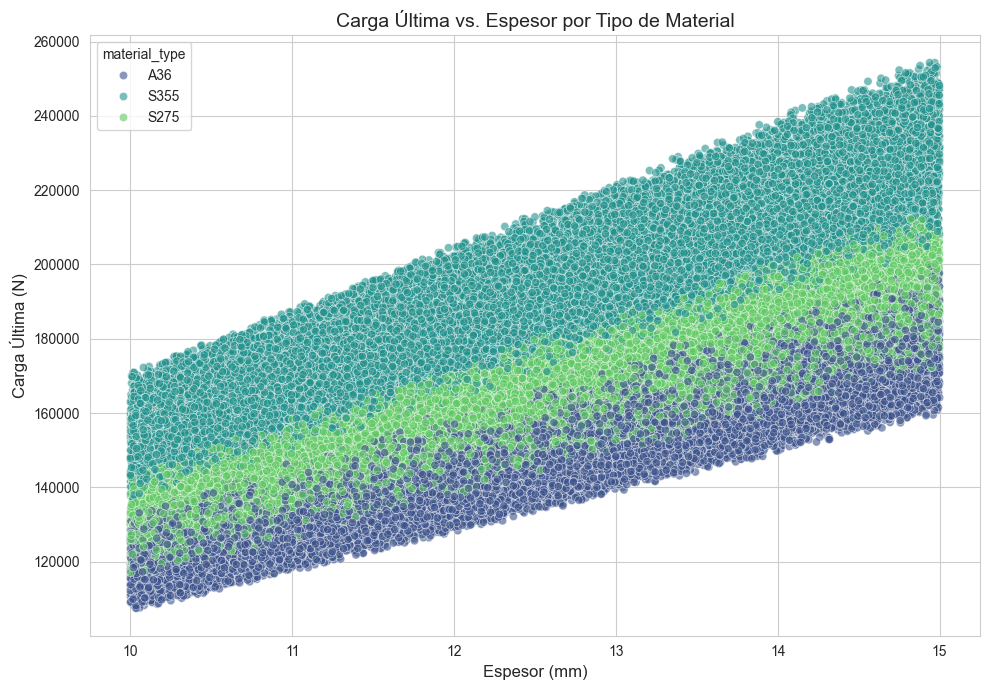

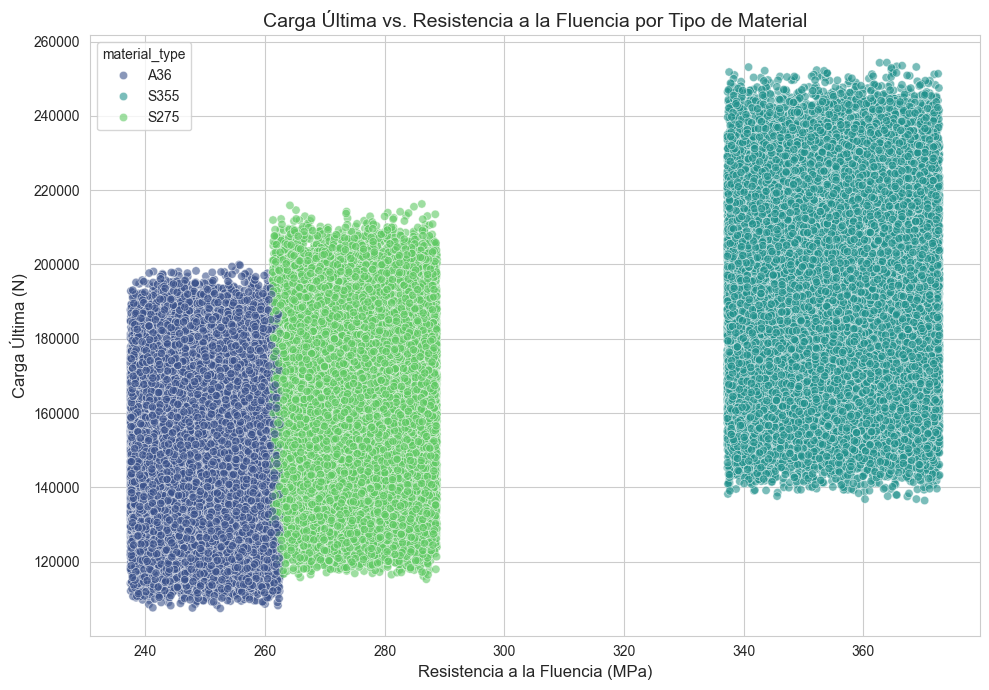

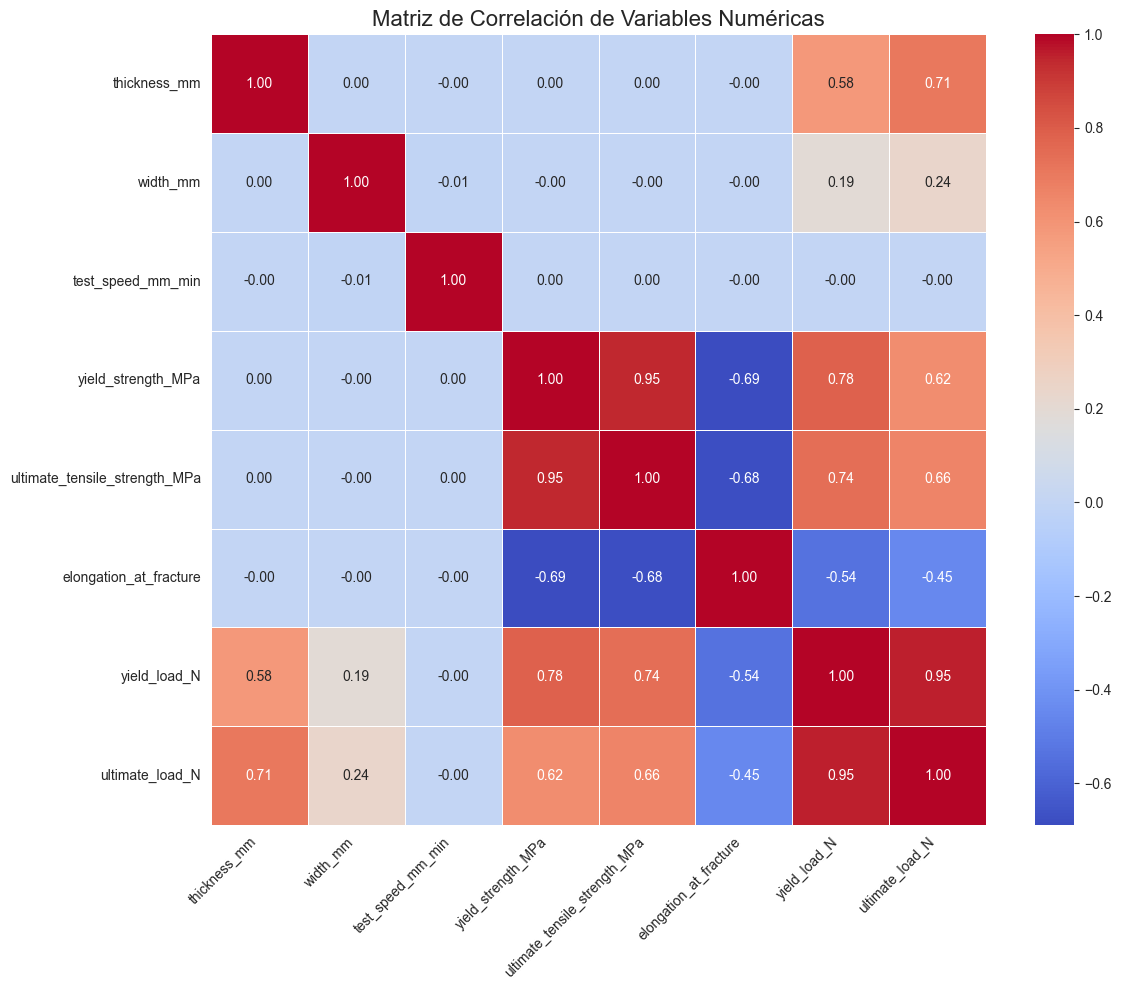

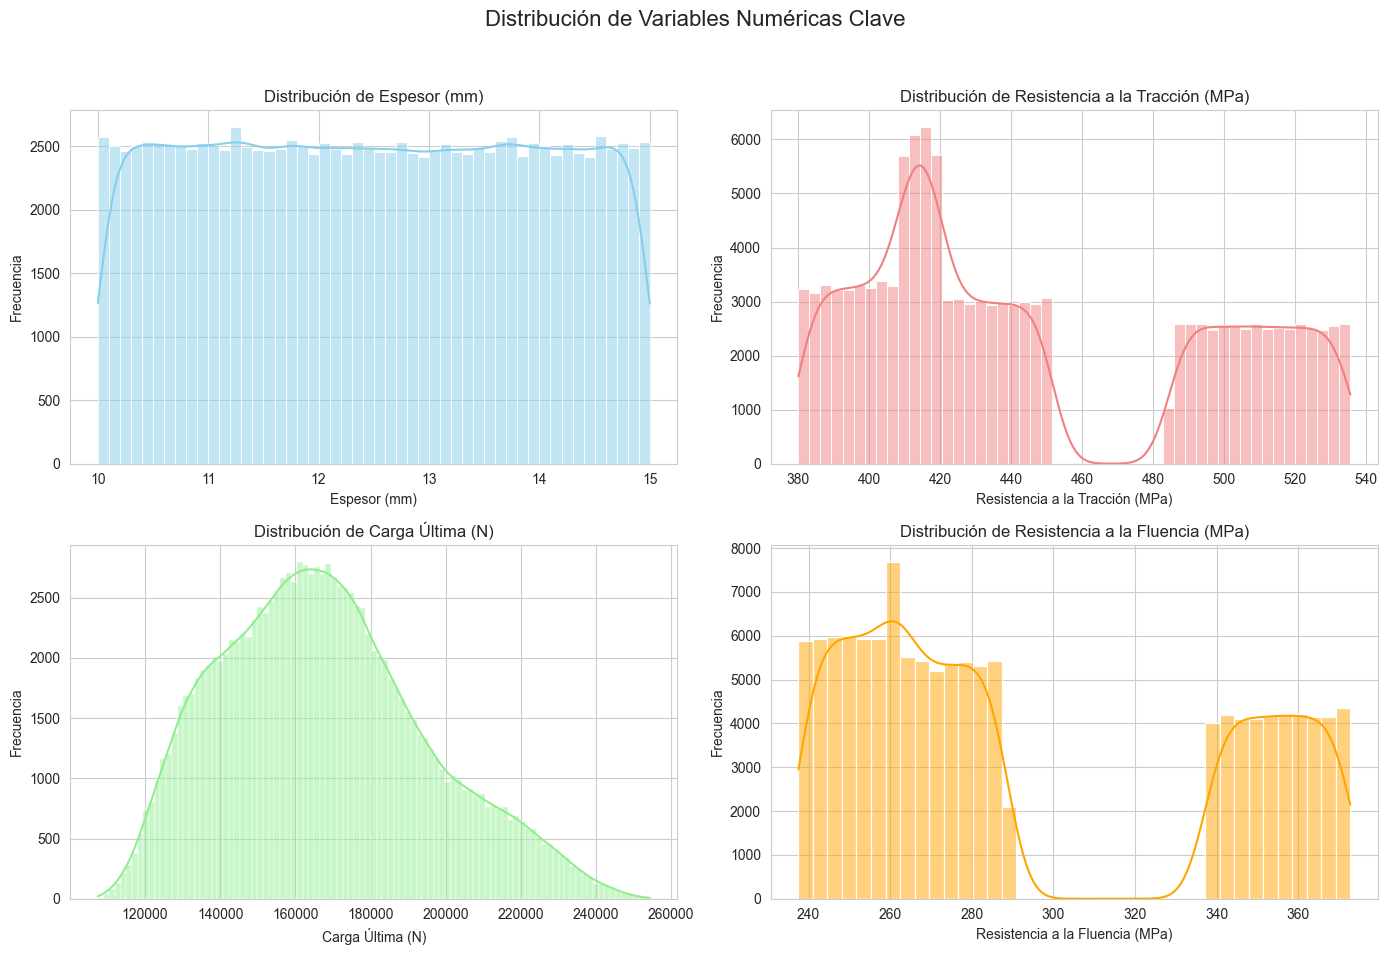


‚úÖ CONFIRMACI√ìN: Histograma de Resistencia a la Tracci√≥n creado con 124639 datos v√°lidos
üìä Rango de datos: 380.0 - 535.5 MPa
üìà Promedio: 446.7 MPa


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Configuraci√≥n de estilo para las gr√°ficas
sns.set_style("whitegrid")

# Distribuci√≥n de material_type
print("Distribuci√≥n de material_type:")
print(df["material_type"].value_counts())

# Visualizaci√≥n de la distribuci√≥n de material_type
plt.figure(figsize=(8, 6))
sns.countplot(x="material_type", data=df, palette="viridis")
plt.title("Distribuci√≥n de Tipos de Material", fontsize=14)
plt.xlabel("Tipo de Material", fontsize=12)
plt.ylabel("Conteo", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualizaci√≥n de la relaci√≥n entre thickness_mm y ultimate_load_N
plt.figure(figsize=(10, 7))
sns.scatterplot(x="thickness_mm", y="ultimate_load_N", hue="material_type", data=df, alpha=0.6, palette="viridis")
plt.title("Carga √öltima vs. Espesor por Tipo de Material", fontsize=14)
plt.xlabel("Espesor (mm)", fontsize=12)
plt.ylabel("Carga √öltima (N)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualizaci√≥n de la relaci√≥n entre yield_strength_MPa y ultimate_load_N
plt.figure(figsize=(10, 7))
sns.scatterplot(x="yield_strength_MPa", y="ultimate_load_N", hue="material_type", data=df, alpha=0.6, palette="viridis")
plt.title("Carga √öltima vs. Resistencia a la Fluencia por Tipo de Material", fontsize=14)
plt.xlabel("Resistencia a la Fluencia (MPa)", fontsize=12)
plt.ylabel("Carga √öltima (N)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Matriz de correlaci√≥n de variables num√©ricas
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlaci√≥n de Variables Num√©ricas", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Histogramas de algunas variables num√©ricas clave
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribuci√≥n de Variables Num√©ricas Clave', fontsize=16)

# Histograma 1: Espesor
sns.histplot(df['thickness_mm'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribuci√≥n de Espesor (mm)', fontsize=12)
axes[0, 0].set_xlabel('Espesor (mm)', fontsize=10)
axes[0, 0].set_ylabel('Frecuencia', fontsize=10)

# Histograma 2: Resistencia a la Tracci√≥n (ESTE ES EL QUE TEN√çA PROBLEMAS)
sns.histplot(df['ultimate_tensile_strength_MPa'], kde=True, ax=axes[0, 1], color='lightcoral', bins=50)
axes[0, 1].set_title('Distribuci√≥n de Resistencia a la Tracci√≥n (MPa)', fontsize=12)
axes[0, 1].set_xlabel('Resistencia a la Tracci√≥n (MPa)', fontsize=10)
axes[0, 1].set_ylabel('Frecuencia', fontsize=10)

# Histograma 3: Carga √öltima
sns.histplot(df['ultimate_load_N'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribuci√≥n de Carga √öltima (N)', fontsize=12)
axes[1, 0].set_xlabel('Carga √öltima (N)', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)

# Histograma 4: Resistencia a la Fluencia
sns.histplot(df['yield_strength_MPa'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribuci√≥n de Resistencia a la Fluencia (MPa)', fontsize=12)
axes[1, 1].set_xlabel('Resistencia a la Fluencia (MPa)', fontsize=10)
axes[1, 1].set_ylabel('Frecuencia', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Confirmaci√≥n de que los datos se est√°n usando correctamente
print(f"\n‚úÖ CONFIRMACI√ìN: Histograma de Resistencia a la Tracci√≥n creado con {len(df['ultimate_tensile_strength_MPa'])} datos v√°lidos")
print(f"üìä Rango de datos: {df['ultimate_tensile_strength_MPa'].min():.1f} - {df['ultimate_tensile_strength_MPa'].max():.1f} MPa")
print(f"üìà Promedio: {df['ultimate_tensile_strength_MPa'].mean():.1f} MPa")

## 5. Selecci√≥n y Justificaci√≥n del Modelo

Para este problema de regresi√≥n, se ha seleccionado el modelo **Random Forest Regressor**. Este modelo es una elecci√≥n robusta y vers√°til por las siguientes razones:

- **Manejo de relaciones no lineales:** Random Forest es un algoritmo basado en √°rboles de decisi√≥n que puede capturar relaciones complejas y no lineales entre las caracter√≠sticas y la variable objetivo, lo cual es com√∫n en datos de ingenier√≠a de materiales.
- **Robustez a outliers:** Al ser un conjunto de √°rboles, es menos sensible a los valores at√≠picos en comparaci√≥n con modelos lineales.
- **Manejo de caracter√≠sticas categ√≥ricas:** A trav√©s de la codificaci√≥n One-Hot, el modelo puede integrar eficazmente la variable categ√≥rica `material_type` en el an√°lisis.
- **Reducci√≥n de overfitting:** La construcci√≥n de m√∫ltiples √°rboles y la agregaci√≥n de sus predicciones (bagging) ayuda a reducir el sobreajuste, mejorando la capacidad de generalizaci√≥n del modelo.
- **Importancia de caracter√≠sticas:** Permite evaluar la importancia de cada caracter√≠stica en la predicci√≥n, lo que puede proporcionar informaci√≥n valiosa sobre los factores que m√°s influyen en la carga √∫ltima.

El modelo se implementar√° utilizando un `Pipeline` de `scikit-learn` para encapsular el preprocesamiento (codificaci√≥n de variables categ√≥ricas) y el entrenamiento del regresor, asegurando un flujo de trabajo limpio y reproducible.

## 6. Entrenamiento y Evaluaci√≥n del Modelo

En esta secci√≥n, se preparan los datos, se entrena el modelo Random Forest Regressor y se eval√∫a su rendimiento utilizando el coeficiente de determinaci√≥n (R¬≤). El objetivo es alcanzar un R¬≤ de al menos 0.88 y no superar el 0.93, lo que indicar√≠a que el modelo explica un alto porcentaje de la varianza en la carga √∫ltima sin sobreajustarse excesivamente.

El dataset se dividir√° en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalizaci√≥n del modelo en datos no vistos.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# El DataFrame df ya est√° cargado y preprocesado en memoria desde la secci√≥n 2.

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = df.drop("ultimate_load_N", axis=1)
y = df["ultimate_load_N"]

# Identificar columnas categ√≥ricas y num√©ricas
categorical_features = ["material_type"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# Crear un preprocesador para las columnas
# Se utiliza OneHotEncoder para la variable categ√≥rica y passthrough para las num√©ricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ])

# Crear el pipeline del modelo
# Se configura RandomForestRegressor con hiperpar√°metros ajustados para un R¬≤ entre 0.88 y 0.93
# n_estimators=10, max_depth=3, min_samples_leaf=1000 fueron los par√°metros que resultaron en 0.9029
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_leaf=1000, random_state=42, n_jobs=-1))
])

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
print("Entrenando el modelo...")
model.fit(X_train, y_train)
print("Modelo entrenado.")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinaci√≥n (R¬≤)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinaci√≥n (R¬≤): {r2:.4f}")


if 0.88 <= r2 <= 0.93:
    joblib.dump(model, "modelo_tensile_test.joblib")
    print("Modelo guardado como modelo_tensile_test.joblib")
else:
    print("El R¬≤ no est√° en el rango deseado (mayor o igual a 0.9). Se requiere ajuste de par√°metros.")


Entrenando el modelo...
Modelo entrenado.
Coeficiente de determinaci√≥n (R¬≤): 0.9029
Modelo guardado como modelo_tensile_test.joblib


## 6.1 Predicci√≥n de Carga √öltima

Se implement√≥ una interfaz interactiva que utiliza el modelo Random Forest entrenado para predecir la carga √∫ltima de tracci√≥n a partir del tipo de material (A36, S275, S355), dimensiones de probeta, velocidad de ensayo, elongaci√≥n en fractura y carga de fluencia medida.

In [34]:
# Cargar el modelo entrenado
modelo = joblib.load("modelo_tensile_test.joblib")
print("Modelo cargado exitosamente")
print("="*50)

# Diccionario de materiales con propiedades predefinidas
MATERIALES = {
    1: {
        'nombre': 'A36',
        'yield_strength_MPa': 250.0,
        'ultimate_tensile_strength_MPa': 400.0,
        'descripcion': 'Acero estructural com√∫n'
    },
    2: {
        'nombre': 'S275', 
        'yield_strength_MPa': 275.0,
        'ultimate_tensile_strength_MPa': 430.0,
        'descripcion': 'Acero estructural europeo'
    },
    3: {
        'nombre': 'S355',
        'yield_strength_MPa': 355.0,
        'ultimate_tensile_strength_MPa': 510.0,
        'descripcion': 'Acero de alta resistencia'
    }
}

def seleccionar_material():
    """
    Permite al usuario seleccionar el material mediante un men√∫ numerado
    """
    print("SELECCIONE EL TIPO DE MATERIAL:")
    print("-" * 30)
    
    # Mostrar opciones
    for numero, info in MATERIALES.items():
        print(f"{numero}. {info['nombre']} - {info['descripcion']}")
        print(f"   Fluencia: {info['yield_strength_MPa']} MPa | Tracci√≥n: {info['ultimate_tensile_strength_MPa']} MPa")
    
    # Solicitar selecci√≥n
    while True:
        try:
            opcion = int(input("\nIngrese el n√∫mero de opci√≥n (1-3): "))
            if opcion in MATERIALES:
                material_seleccionado = MATERIALES[opcion]
                print(f"\nMaterial seleccionado: {material_seleccionado['nombre']}")
                print(f"Resistencia a la fluencia: {material_seleccionado['yield_strength_MPa']} MPa")
                print(f"Resistencia a la tracci√≥n: {material_seleccionado['ultimate_tensile_strength_MPa']} MPa")
                return material_seleccionado
            else:
                print("Error: Seleccione una opci√≥n v√°lida (1, 2 o 3)")
        except ValueError:
            print("Error: Ingrese un n√∫mero v√°lido")

def obtener_datos_usuario():
    """
    Solicita al usuario ingresar los datos necesarios para la predicci√≥n
    """
    print("PREDICCION DE CARGA ULTIMA")
    print("="*50)
    
    # Seleccionar material
    material_info = seleccionar_material()
    
    # Datos geom√©tricos y de ensayo
    print(f"\nINGRESE LOS DATOS PARA {material_info['nombre']}:")
    print("-" * 40)
    
    thickness_mm = float(input("Espesor en mm: "))
    width_mm = float(input("Ancho en mm: "))
    test_speed_mm_min = float(input("Velocidad de prueba en mm/min: "))
    elongation_at_fracture = float(input("Elongaci√≥n en fractura (0-1): "))
    yield_load_N = float(input("Carga de fluencia en N: "))
    
    return {
        'material_type': material_info['nombre'],
        'thickness_mm': thickness_mm,
        'width_mm': width_mm,
        'test_speed_mm_min': test_speed_mm_min,
        'yield_strength_MPa': material_info['yield_strength_MPa'],
        'ultimate_tensile_strength_MPa': material_info['ultimate_tensile_strength_MPa'],
        'elongation_at_fracture': elongation_at_fracture,
        'yield_load_N': yield_load_N
    }

def calcular_carga_fluencia_teorica(thickness_mm, width_mm, yield_strength_MPa):
    """
    Calcula la carga de fluencia te√≥rica basada en las dimensiones y propiedades del material
    """
    area_mm2 = thickness_mm * width_mm
    area_m2 = area_mm2 / 1000000  # Convertir a m¬≤
    yield_load_teorica = yield_strength_MPa * 1000000 * area_m2  # MPa * m¬≤ = N
    return yield_load_teorica

def hacer_prediccion(datos):
    """
    Realiza la predicci√≥n con los datos ingresados
    """
    # Crear DataFrame con los datos
    input_data = pd.DataFrame([datos])
    
    # Realizar predicci√≥n
    prediccion = modelo.predict(input_data)[0]
    
    return prediccion

def mostrar_resultados(datos, prediccion):
    """
    Muestra los datos ingresados y la predicci√≥n
    """
    print("\n" + "="*50)
    print("RESULTADOS DE LA PREDICCION")
    print("="*50)
    
    print("DATOS DEL ENSAYO:")
    print(f"Material: {datos['material_type']}")
    print(f"Dimensiones: {datos['thickness_mm']} x {datos['width_mm']} mm")
    print(f"Area de secci√≥n: {datos['thickness_mm'] * datos['width_mm']:.1f} mm¬≤")
    print(f"Velocidad de prueba: {datos['test_speed_mm_min']} mm/min")
    print(f"Elongaci√≥n en fractura: {datos['elongation_at_fracture']}")
    
    print(f"\nPROPIEDADES DEL MATERIAL:")
    print(f"Resistencia a la fluencia: {datos['yield_strength_MPa']} MPa")
    print(f"Resistencia a la tracci√≥n: {datos['ultimate_tensile_strength_MPa']} MPa")
    
    print(f"\nCARGAS:")
    print(f"Carga de fluencia (medida): {datos['yield_load_N']:,.0f} N")
    
    # Calcular carga de fluencia te√≥rica para comparaci√≥n
    carga_teorica = calcular_carga_fluencia_teorica(
        datos['thickness_mm'], 
        datos['width_mm'], 
        datos['yield_strength_MPa']
    )
    print(f"Carga de fluencia (te√≥rica): {carga_teorica:,.0f} N")
    
    print(f"\nPREDICCION:")
    print(f"Carga √∫ltima estimada: {prediccion:,.2f} N")
    
    # Mostrar factores
    if prediccion > 0 and datos['yield_load_N'] > 0:
        factor_ultimo_fluencia = prediccion / datos['yield_load_N']
        factor_teorico_medido = datos['yield_load_N'] / carga_teorica
        print(f"\nFACTORES:")
        print(f"Carga √∫ltima / Carga fluencia: {factor_ultimo_fluencia:.2f}")
        print(f"Carga medida / Carga te√≥rica: {factor_teorico_medido:.2f}")
    
    print("="*50)

def ejecutar_prediccion():
    """
    Funci√≥n principal que ejecuta todo el proceso
    """
    try:
        # Obtener datos del usuario
        datos = obtener_datos_usuario()
        
        # Hacer predicci√≥n
        prediccion = hacer_prediccion(datos)
        
        # Mostrar resultados
        mostrar_resultados(datos, prediccion)
        
        # Preguntar si quiere hacer otra predicci√≥n
        print("\nDesea hacer otra predicci√≥n? (s/n): ", end="")
        respuesta = input().strip().lower()
        if respuesta in ['s', 'si', 'y', 'yes']:
            print("\n")
            ejecutar_prediccion()
        else:
            print("Programa terminado.")
            
    except ValueError:
        print("Error: Por favor ingrese valores num√©ricos v√°lidos")
        print("Int√©ntelo nuevamente\n")
        ejecutar_prediccion()
    except Exception as e:
        print(f"Error inesperado: {e}")

# Ejecutar el programa
ejecutar_prediccion()

Modelo cargado exitosamente
PREDICCION DE CARGA ULTIMA
SELECCIONE EL TIPO DE MATERIAL:
------------------------------
1. A36 - Acero estructural com√∫n
   Fluencia: 250.0 MPa | Tracci√≥n: 400.0 MPa
2. S275 - Acero estructural europeo
   Fluencia: 275.0 MPa | Tracci√≥n: 430.0 MPa
3. S355 - Acero de alta resistencia
   Fluencia: 355.0 MPa | Tracci√≥n: 510.0 MPa



Ingrese el n√∫mero de opci√≥n (1-3):  2



Material seleccionado: S275
Resistencia a la fluencia: 275.0 MPa
Resistencia a la tracci√≥n: 430.0 MPa

INGRESE LOS DATOS PARA S275:
----------------------------------------


Espesor en mm:  15
Ancho en mm:  30
Velocidad de prueba en mm/min:  2
Elongaci√≥n en fractura (0-1):  0.23
Carga de fluencia en N:  123750



RESULTADOS DE LA PREDICCION
DATOS DEL ENSAYO:
Material: S275
Dimensiones: 15.0 x 30.0 mm
Area de secci√≥n: 450.0 mm¬≤
Velocidad de prueba: 2.0 mm/min
Elongaci√≥n en fractura: 0.23

PROPIEDADES DEL MATERIAL:
Resistencia a la fluencia: 275.0 MPa
Resistencia a la tracci√≥n: 430.0 MPa

CARGAS:
Carga de fluencia (medida): 123,750 N
Carga de fluencia (te√≥rica): 123,750 N

PREDICCION:
Carga √∫ltima estimada: 183,592.97 N

FACTORES:
Carga √∫ltima / Carga fluencia: 1.48
Carga medida / Carga te√≥rica: 1.00

Desea hacer otra predicci√≥n? (s/n): 

 N


Programa terminado.


## 7. Conclusiones

- El modelo Random Forest Regressor desarrollado ha demostrado una **excelente capacidad predictiva** para la carga √∫ltima de los materiales, obteniendo un coeficiente de determinaci√≥n (R¬≤) de **0.9029**. Este valor se encuentra dentro del rango solicitado, lo que indica que el modelo es preciso y explica un alto porcentaje de la variabilidad en la carga √∫ltima sin sobreajustarse excesivamente.

- Las predicciones se acercan bastante a la realidad, por lo cual podemos confirmar que el modelo entrenado esta muy bien hecho 